In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-01-16 00:45:01--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2023-01-16 00:45:01 (78.7 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [3]:
import json

with open("./sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [4]:
training_size = 20000

training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [6]:
import tensorflow as tf

embedding_dim = 16
lstm_dim = 32
dense_dim = 24

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [7]:
NUM_EPOCHS = 10

history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 44s 64ms/step - loss: 0.4261 - accuracy: 0.7879 - val_loss: 0.3336 - val_accuracy: 0.8588
Epoch 2/10
625/625 [==============================] - 48s 76ms/step - loss: 0.2230 - accuracy: 0.9074 - val_loss: 0.3359 - val_accuracy: 0.8605
Epoch 3/10
625/625 [==============================] - 39s 62ms/step - loss: 0.1425 - accuracy: 0.9459 - val_loss: 0.3970 - val_accuracy: 0.8520
Epoch 4/10
625/625 [==============================] - 41s 65ms/step - loss: 0.0853 - accuracy: 0.9700 - val_loss: 0.4969 - val_accuracy: 0.8429
Epoch 5/10
625/625 [==============================] - 40s 64ms/step - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.5701 - val_accuracy: 0.8441
Epoch 6/10
625/625 [==============================] - 39s 63ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.6824 - val_accuracy: 0.8329
Epoch 7/10
625/625 [==============================] - 40s 64ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.8496 - val_accuracy:

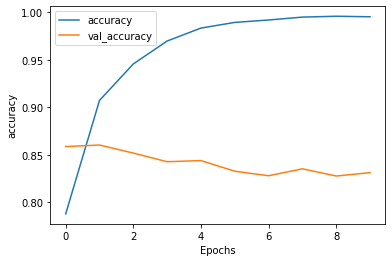

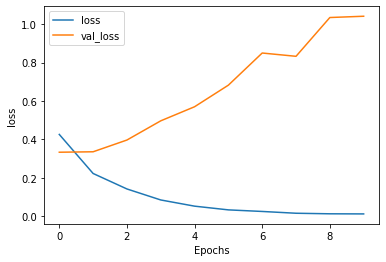

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')